<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/unidad2/practica7/P7_G11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 7: Filtrado en la frecuencia
```

**INTEGRANTES:**

1. Perez García Gustavo Rafael
2. Salazar Llamoga William Jesús
3. Solon Aquino Jashua Jafet

### 1. Implemente un algoritmo que permita realizar la traslación de coordenadas de una imagen
* Se debe ampliar previamente la imagen con 0'spara poder implementarlo

* Realizar el padding usando la función:

`np.pad(img,((100,100),(100,100)),'constant',constant_values=((0, 0),(0,0)))`

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

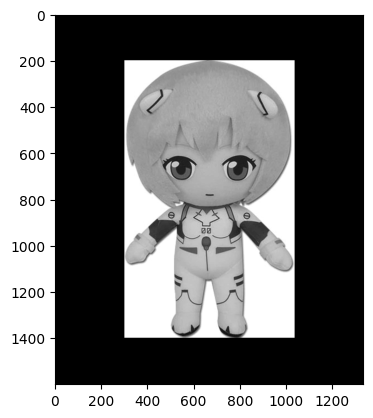

(1200, 736)

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
img_padded = np.pad(img,((200,200),(300,300)),'constant',constant_values=((0, 0),(0,0)))
plt.imshow(img_padded, cmap='gray')
plt.show()
img.shape

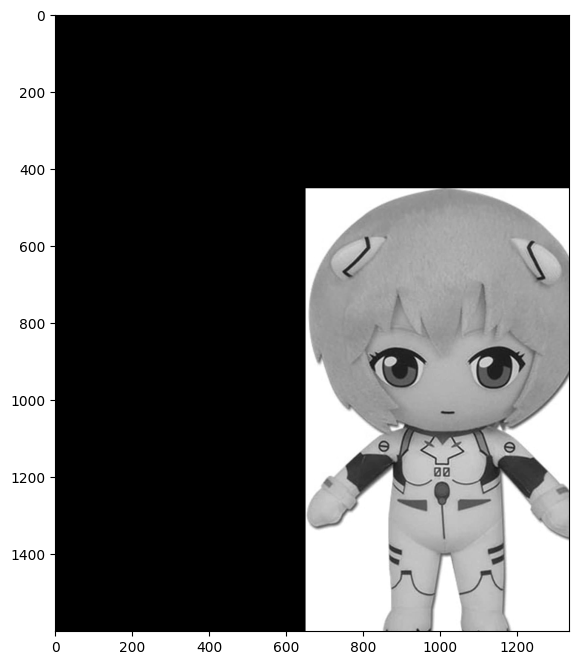

In [ ]:
tx, ty = (250, 350)

fil, col = img_padded.shape
img_traslated = np.zeros_like(img_padded)

for i in range(fil):
    for j in range(col):
        if (i + tx < fil) and (j + ty < col):
            img_traslated[i+tx, j+ty] = img_padded[i, j]

plt.figure(figsize=(8,8))
plt.imshow(img_traslated, cmap='gray')
plt.show()

### 2. Implemente una  algoritmo básico que permita realizar una máscara que tenga un circulo blanco en un fondo negro
* El circulo debe estar centrado
* Use la Funcion `row,col=np.ogrid[0:r,0:c]` para simplificar su realización

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


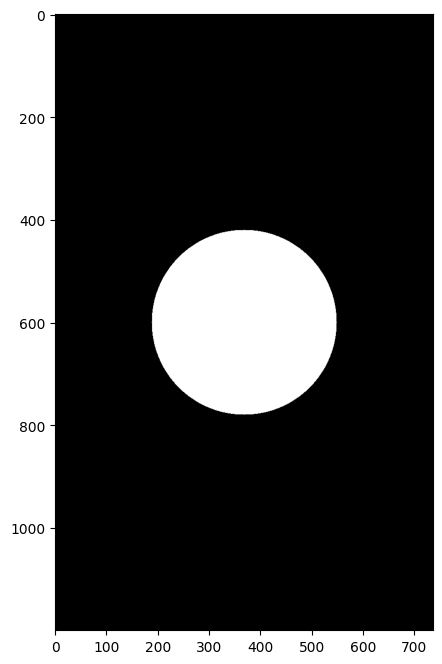

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)

fil, col = img.shape

H = np.zeros_like(img)
f, c = np.ogrid[0:fil,0:col]

H = ((f-fil/2)**2 + (c-col/2)**2) <=  (0.15*fil)**2

H = np.int32(H)
print(H)

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Qué hace la función np.ogrid?

La función np.ogrid crea dos matrices unidimensionales que contienen los índices de filas y columnas de una imagen. Esto es útil para generar una malla de coordenadas que puede utilizarse en el procesamiento de imágenes.

2. Como haría que el circulo este centrado en las coordenadas 0,0?

Para centrar el círculo en las coordenadas (0, 0), se debe calcular el centro de la imagen y restar esos valores a las matrices de filas y columnas generadas con np.ogrid. De esta manera, se utilizarán coordenadas relativas al centro de la imagen en lugar de los índices absolutos.

3. Evalúe el efecto de la función np.fft.fftshift y np.fft.ifftshift

np.fft.fftshift reordena los cuadrantes de una matriz 2D de modo que la componente de frecuencia cero esté en el centro. Esto es útil para visualizar el espectro de potencia de una señal en el dominio de Fourier. np.fft.ifftshift realiza la operación inversa, devolviendo la matriz a su estado original. Estas funciones son importantes en el análisis de Fourier de imágenes y señales.

```

Respuestas:




### 3. Implemente una  algoritmo basico que permita realizar una máscara con un circulo central blanco difuminado usando una distribucion butterwoth

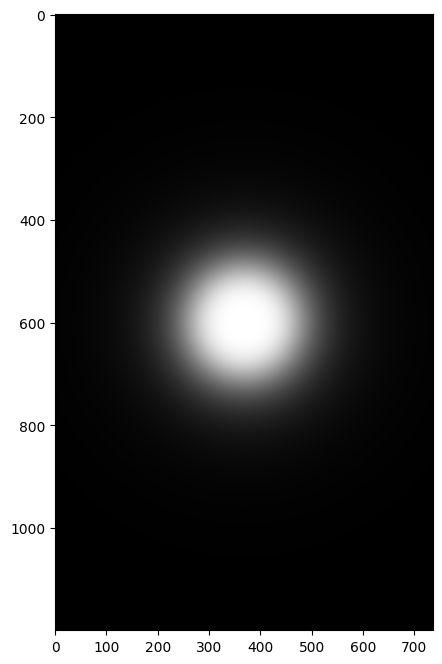

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

f, c = np.ogrid[0:fil,0:col]
n = 2

D0 = 0.1*fil
D =  np.sqrt( (f-fil/2)**2 + (c-col/2)**2 )

H = 1/(1 + (D/D0)**(2*n))

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Que efecto tiene la variable n en la distribución?

La variable n en la distribución Butterworth ajusta la pendiente de la función de transferencia. Un n alto produce una transición abrupta entre los valores altos y bajos, creando un círculo más definido. En cambio, un n bajo genera una transición suave, resultando en un círculo más difuminado. Así, n permite controlar la suavidad o definición del círculo central en la máscara Butterworth.

```

### 4. Implemente una  algoritmo basico que permita realizar una máscara con un circulo central blanco difuminado usando una distribucion Gaussiana

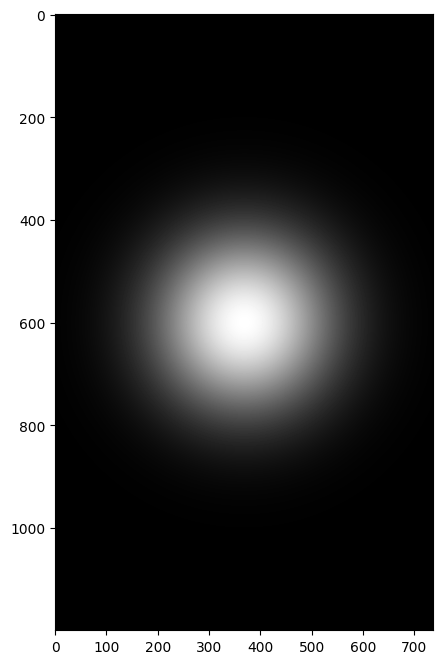

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

f, c = np.ogrid[0:fil,0:col]
n = 2

D0 = 0.1*fil
D =  np.sqrt( (f-fil/2)**2 + (c-col/2)**2 )

H = np.exp(-(D**2)/(2*(D0**2)))

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Como se controla el tamaño de la figura?
  El tamaño de la figura se controla mediante el argumento figsize=(8,8) en la función plt.figure(). Este argumento especifica el ancho y alto de la figura en pulgadas.

2. Es posible cambiar el difuminado como en el filtro butterworth?

  Si, dado que el parámetro D0 controla el tamaño o la escala del círculo difuminado. Se ajusta este valor para obtener más o menos difuminado, de manera similar a cómo se controla el efecto en el filtro Butterworth.

```

### 5. Muestre el espectro de frecuencia de una imagen, luego seccione un rectangulo del espectro y regrese al dominio del tiempo, muestre el resultado sobre la imagen


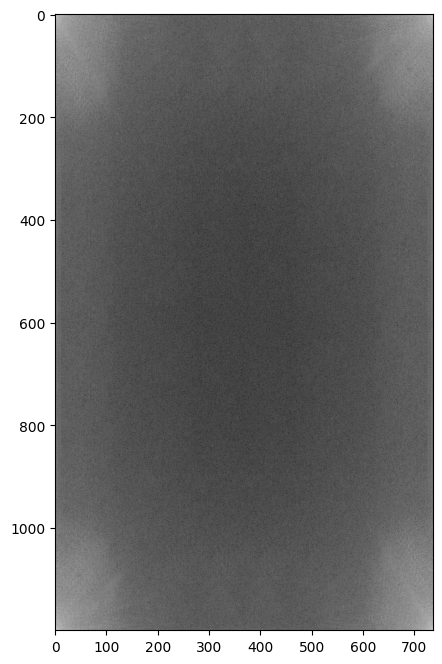

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)

img_fft = np.fft.fft2(img)
espectro = np.log(1 + np.abs(img_fft))

plt.figure(figsize=(8,8))
plt.imshow(espectro, cmap='gray')
plt.show()

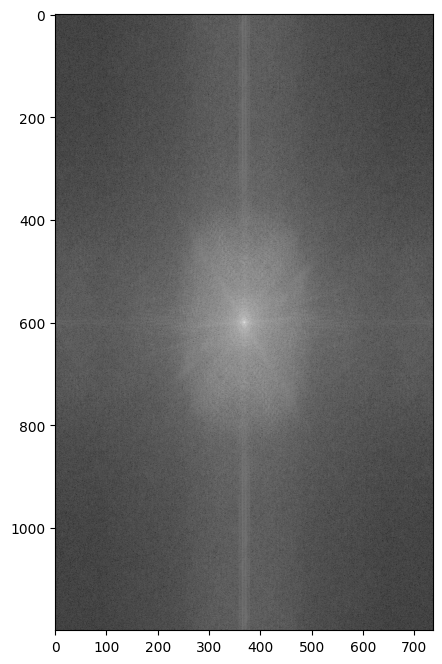

In [ ]:
img_fft_shift = np.fft.fftshift(img_fft)
espectro = np.log(1 + np.abs(img_fft_shift))

plt.figure(figsize=(8,8))
plt.imshow(espectro, cmap='gray')
plt.show()

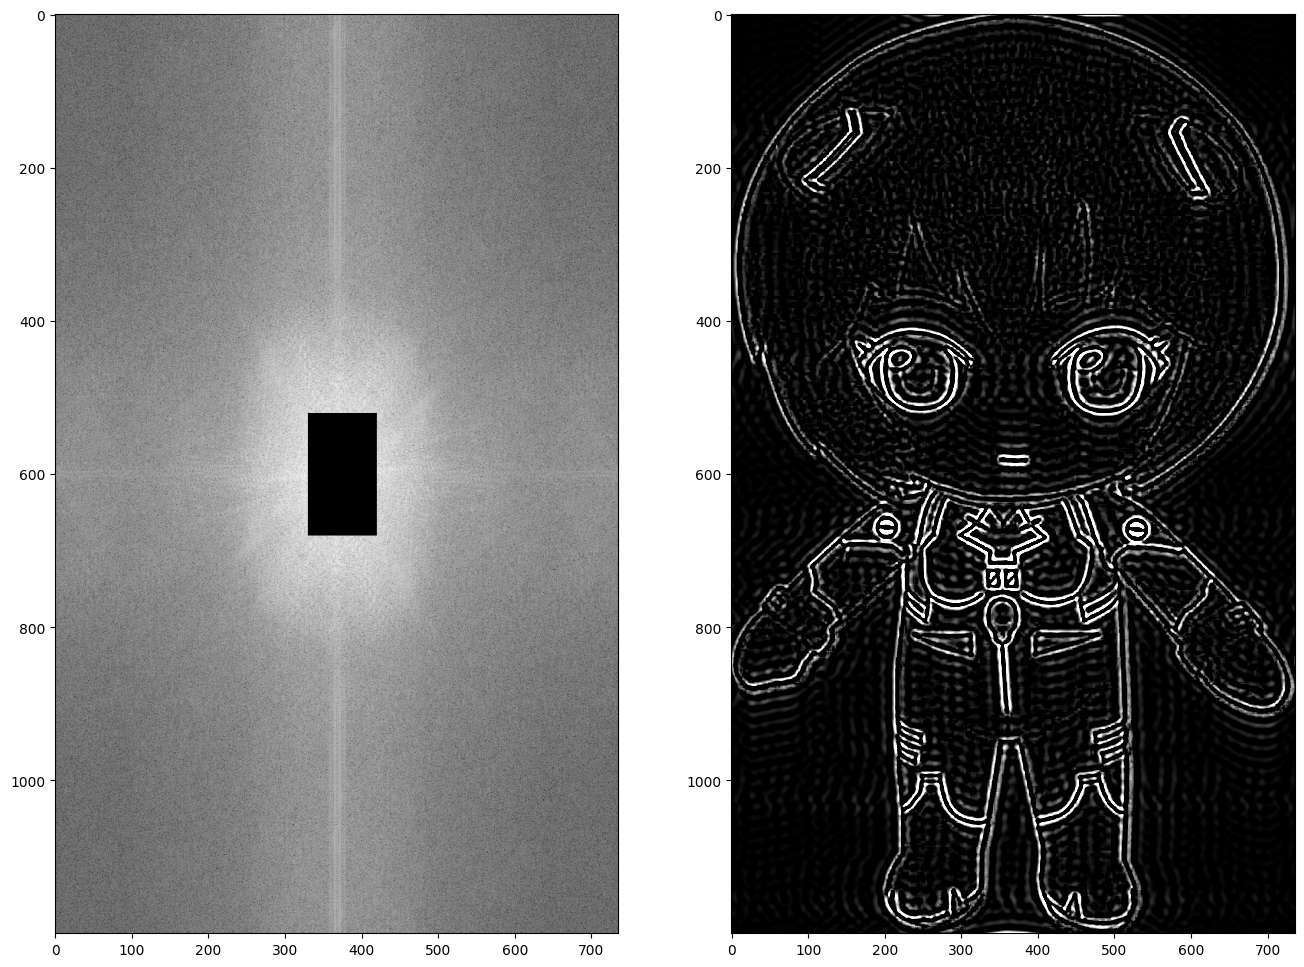

In [ ]:
img_fft_shift[521:681, 330:420] = 0
espectro = np.log(1 + np.abs(img_fft_shift))

img_fft = np.fft.ifftshift(img_fft_shift)

img_ifft = np.fft.ifft2(img_fft)
img_ifft_real = np.real(img_ifft)


plt.subplots(1,2,figsize=(16,16))
plt.subplot(121)
plt.imshow(espectro, cmap='gray')
plt.subplot(122)
plt.imshow(img_ifft_real*10, cmap='gray', vmin=0, vmax=255)
plt.show()

```
1. Cual fue el efecto de eliminar el cuadrado en el espectro de frecuencias?

Al eliminar el cuadrado en el espectro de frecuencias, se está removiendo una porción de la información de frecuencia de la imagen. Esto se traduce en una distorsión o efecto de "eco" en el dominio espacial (imagen reconstruida). Los detalles y bordes de la imagen se ven afectados, ya que se ha suprimido parte de la información de alta frecuencia que los define.

2. Verifique que es lo que sucede si elimina todo el espectro excepto el cuadrado central

Si se elimina todo el espectro de frecuencias excepto el cuadrado central, el resultado sería una imagen muy suavizada y borrosa. Esto se debe a que el cuadrado central representa las bajas frecuencias de la imagen, que contienen la información de la estructura y forma general, pero no los detalles finos.

3. A que cree que se debe el efecto de distorsión (efecto eco)?

El efecto de distorsión o "eco" se debe a que al eliminar una región del espectro de frecuencias, se está removiendo información importante de la imagen, provocando que la reconstrucción en el dominio espacial presente artefactos y distorsiones.

```

### 6. Implemente los filtros frecuenciales pasa-bajos
* El padding debe ser el doble de la dimension de la imagen original

#### 6.1. Filtro ideal

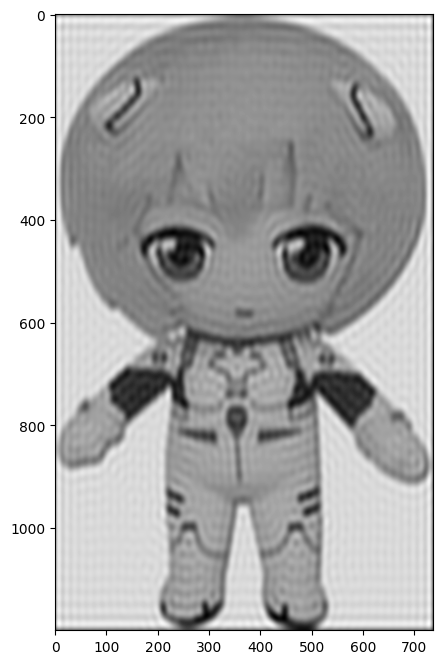

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

H = ((f-fil)**2 + (c-col)**2) <=  (0.08*fil)**2
H_pb_ideal = np.int32(H)

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_ideal

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar la aplicación del filtro ideal mostrado en la siguiente figura
```

In [ ]:
#PASA BAJOS IDEAL

def filtro_ideal_pb(ruta='Imagenes/rei.jpg', suavizado=0.07):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil1,col1 = img.shape
  img_padded = np.pad(img,((round(fil1/2),round(fil1/2)),(round(col1/2),round(col1/2))),'constant',constant_values=((0, 0),(0,0)))

  #Traslado
  tx, ty = (-round(fil1/2), -(round(col1/2)))

  fil, col = img_padded.shape
  img_traslated = np.zeros_like(img_padded)

  for i in range(fil):
      for j in range(col):
          if (i + tx < fil) and (j + ty < col):
              img_traslated[i+tx, j+ty] = img_padded[i, j]

  #Filtro
  H = np.zeros_like(img_traslated)
  f, c = np.ogrid[0:fil,0:col]

  H = ((f-fil/2)**2 + (c-col/2)**2) <=  (suavizado*fil)**2
  H_ideal_pb = np.int32(H)

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_ideal_pb

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:fil, 0:col]
  g_real2 = np.real(g)[0:fil1, 0:col1]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_ideal_pb, cmap='gray')
  axs[1][0].set_title('Filtro Ideal Pb')
  #Convolución
  axs[1][1].imshow(g_real1, cmap='gray')
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2, cmap='gray')
  axs[1][2].set_title('Resultado 2')

  plt.show()

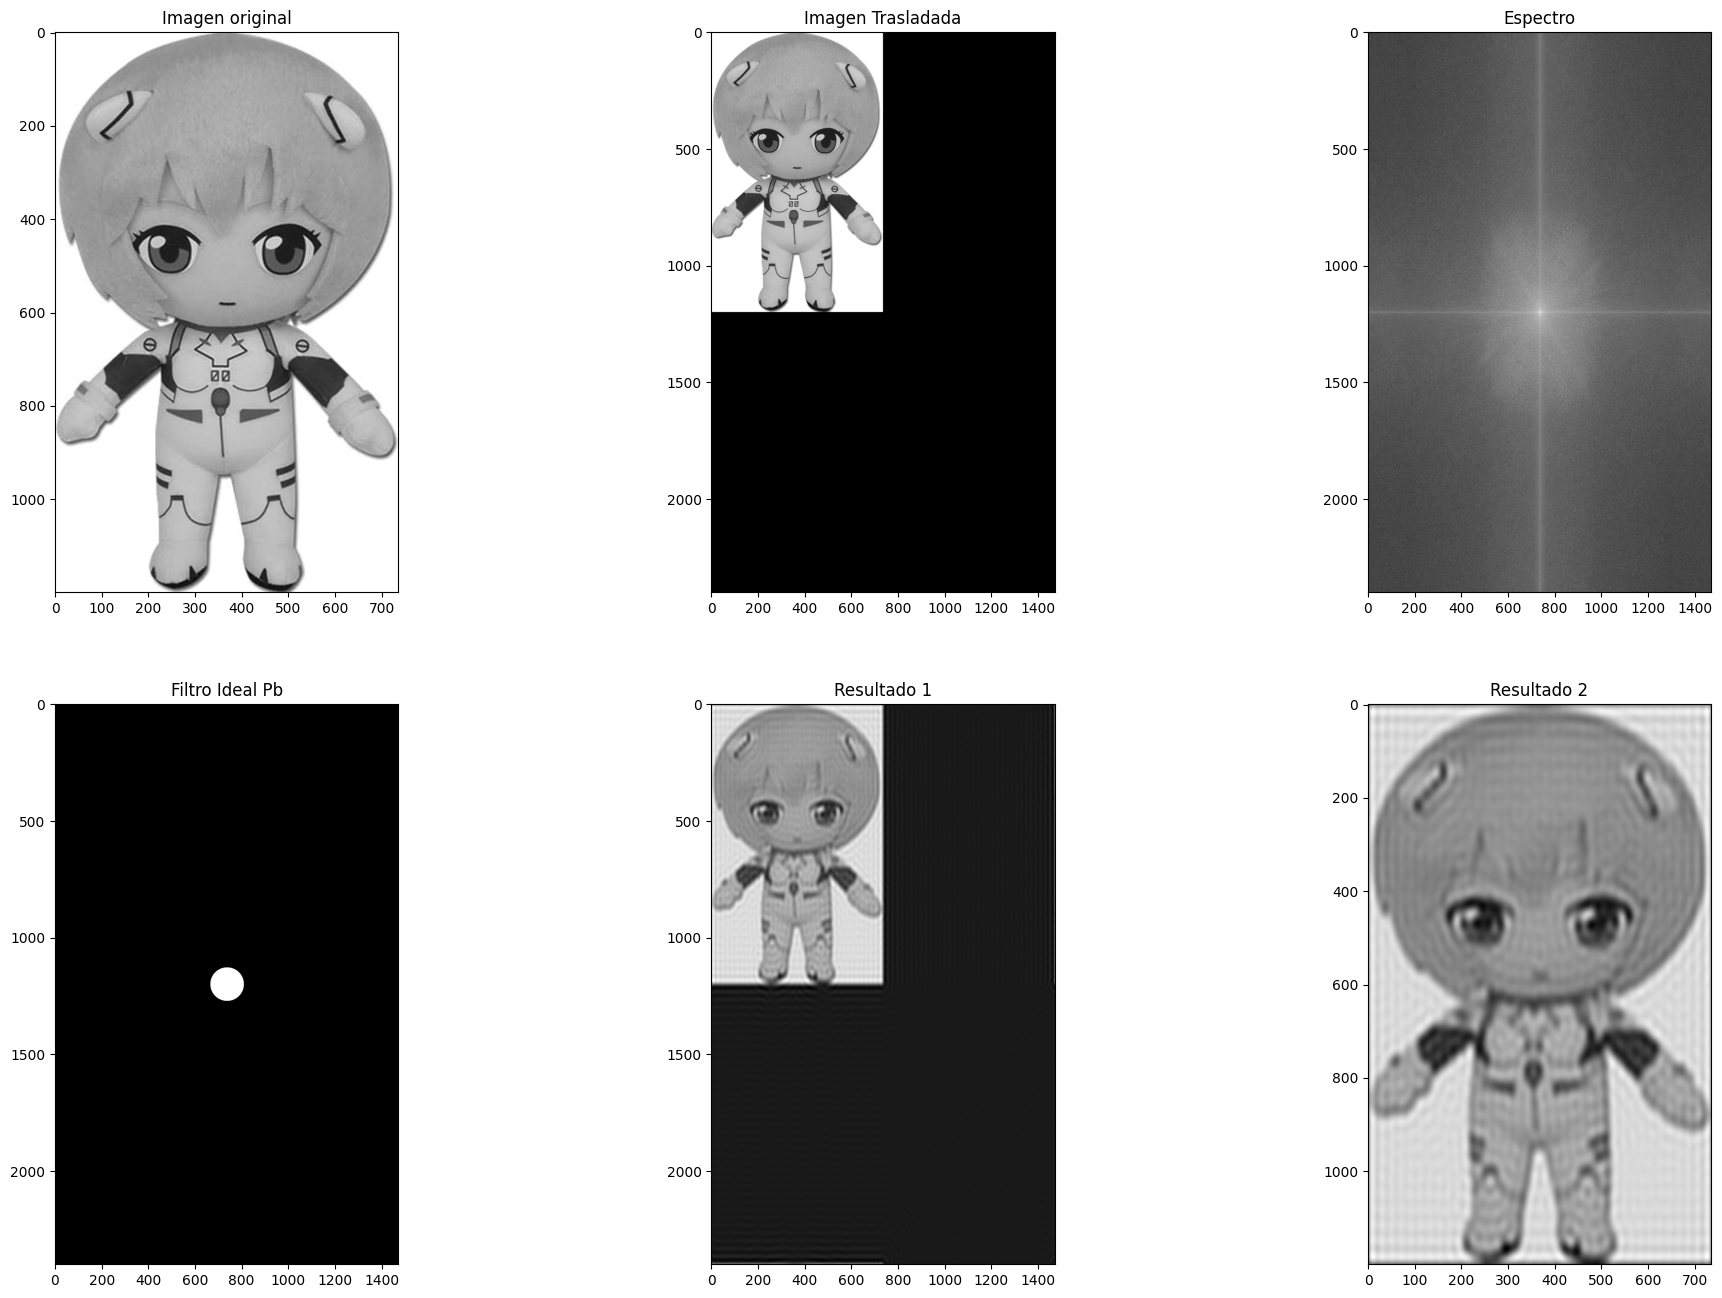

In [ ]:
ruta = 'Imagenes/rei.jpg'
filtro_ideal_pb(ruta,0.03)

#### 6.2. Filtro Butterworth

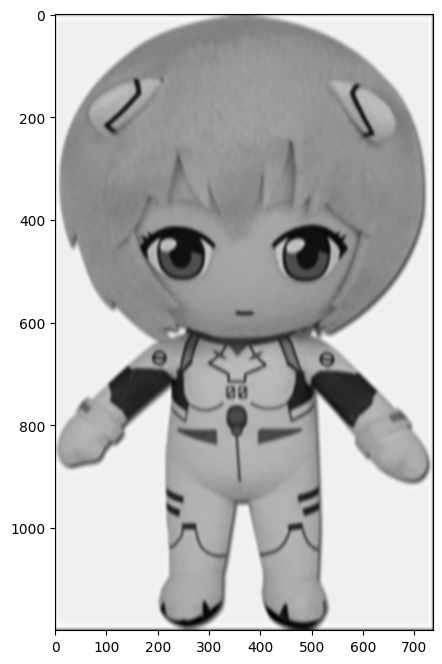

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

n = 2
D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.12*fil)
H_pb_butter = 1/(1 + (D/D0)**(2*n))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_butter

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar la figura mostrada a continuación
```

In [ ]:
#PASA BAJOS BUTTERWORTH
def filtro_butterworth_pb(ruta='Imagenes/rei.jpg', suavizado=0.1, n=2):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil1,col1 = img.shape
  img_padded = np.pad(img,((round(fil1/2),round(fil1/2)),(round(col1/2),round(col1/2))),'constant',constant_values=((0, 0),(0,0)))

  #Traslado
  tx, ty = (-round(fil1/2), -(round(col1/2)))

  fil, col = img_padded.shape
  img_traslated = np.zeros_like(img_padded)

  for i in range(fil):
      for j in range(col):
          if (i + tx < fil) and (j + ty < col):
              img_traslated[i+tx, j+ty] = img_padded[i, j]
  #Filtro
  f, c = np.ogrid[0:fil,0:col]
  D =  np.sqrt( (f-fil1)**2 + (c-col1)**2 )
  D0 = (suavizado*fil1)
  H_butter_pb = 1/(1 + (D/D0)**(2*n))

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_butter_pb

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:fil, 0:col]
  g_real2 = np.real(g)[0:fil1, 0:col1]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_butter_pb, cmap='gray')
  axs[1][0].set_title('Filtro Butterworth Pb')
  #Convolución
  axs[1][1].imshow(g_real1, cmap='gray')
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2, cmap='gray')
  axs[1][2].set_title('Resultado 2')

  plt.show()

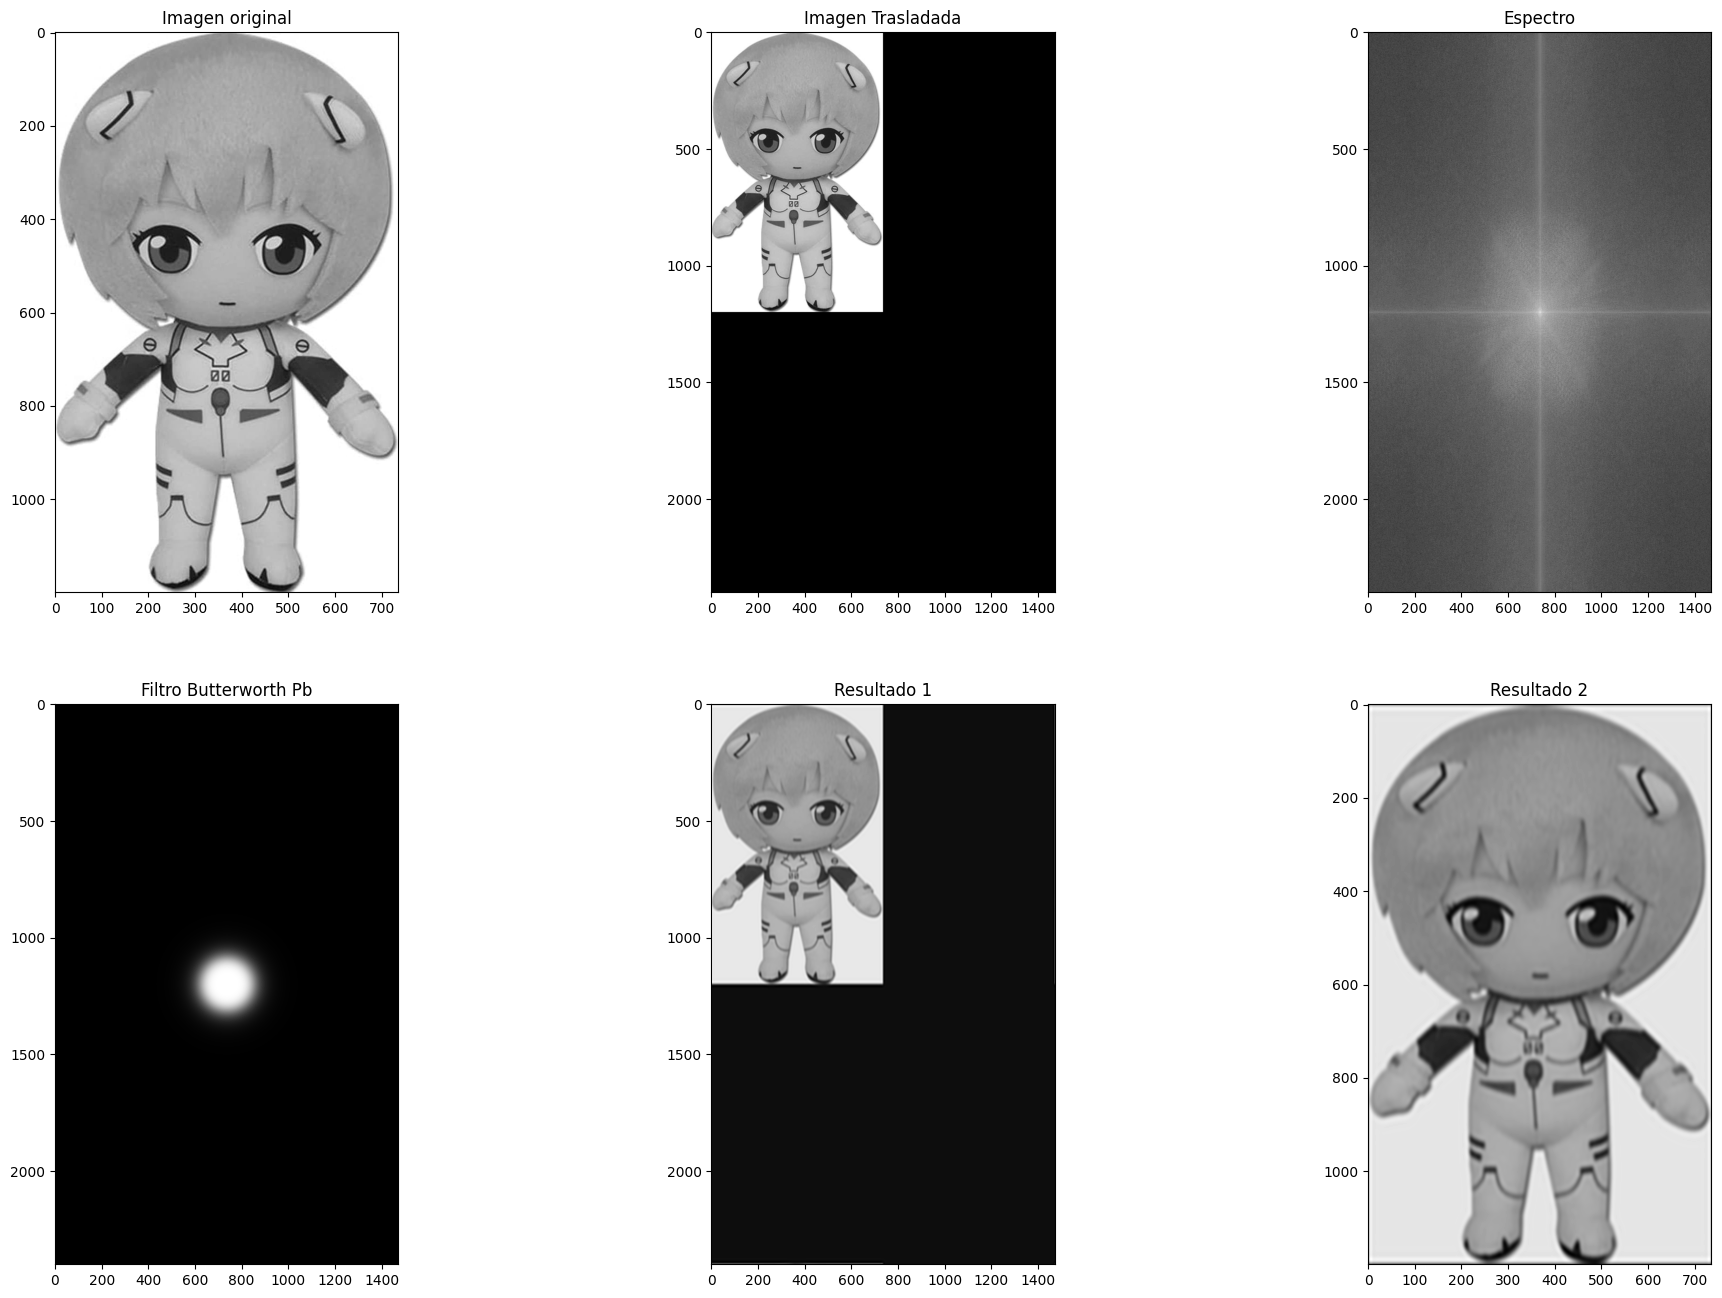

In [ ]:
filtro_butterworth_pb(ruta,0.1,3)

#### 6.3. Filtro gaussiano

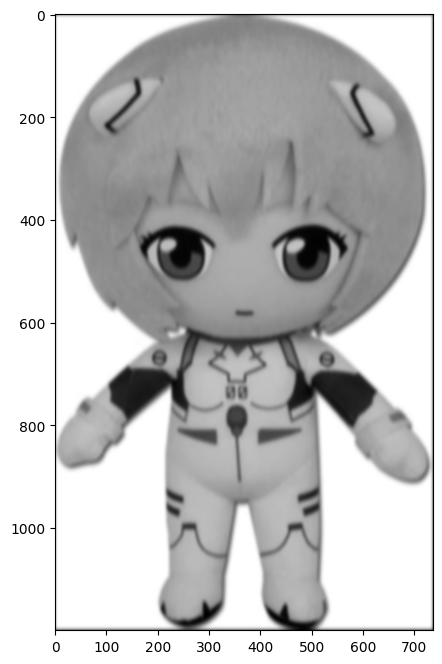

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.08*fil)
H_pb_gauss = np.exp(-(D**2)/(2*(D0**2)))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_gauss

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

In [ ]:
#PASA BAJOS GAUSSIANO

def filtro_gaussiano_pb(ruta='Imagenes/rei.jpg', suavizado=0.08):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil1,col1 = img.shape
  img_padded = np.pad(img,((round(fil1/2),round(fil1/2)),(round(col1/2),round(col1/2))),'constant',constant_values=((0, 0),(0,0)))

  #Traslado
  tx, ty = (-round(fil1/2), -(round(col1/2)))

  fil, col = img_padded.shape
  img_traslated = np.zeros_like(img_padded)

  for i in range(fil):
      for j in range(col):
          if (i + tx < fil) and (j + ty < col):
              img_traslated[i+tx, j+ty] = img_padded[i, j]
  #Filtro
  f, c = np.ogrid[0:fil,0:col]
  D =  np.sqrt( (f-fil1)**2 + (c-col1)**2 )
  D0 = (suavizado*fil1)
  H_gauss_pb = np.exp(-(D**2)/(2*(D0**2)))

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_gauss_pb

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:fil, 0:col]
  g_real2 = np.real(g)[0:fil1, 0:col1]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_gauss_pb, cmap='gray')
  axs[1][0].set_title('Filtro Gaussiano Pb')
  #Convolución
  axs[1][1].imshow(g_real1, cmap='gray')
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2, cmap='gray')
  axs[1][2].set_title('Resultado 2')

  plt.show()

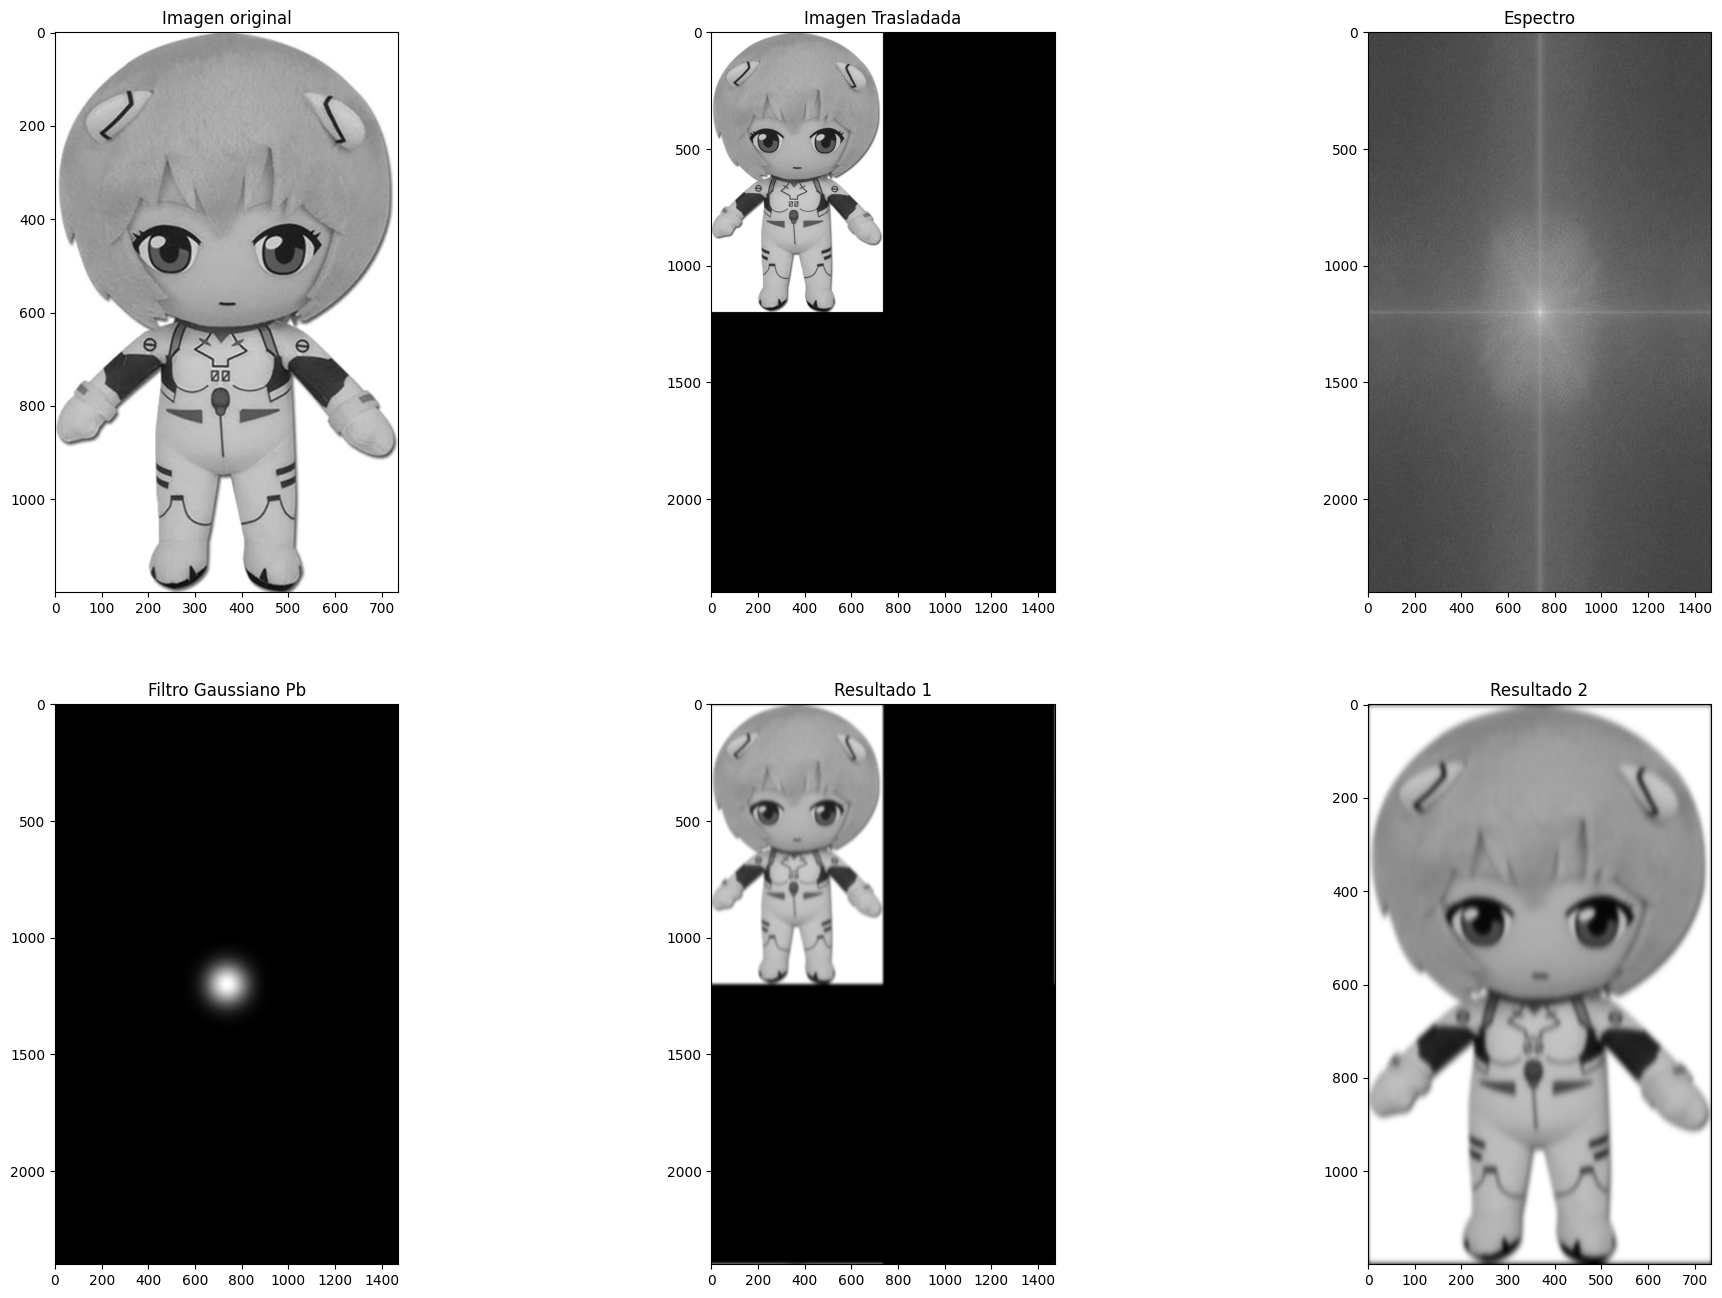

In [ ]:
filtro_gaussiano_pb(ruta,0.05)

### 7. Implemente los filtros frecuenciales pasa-altos

#### 7.1. Filtro ideal pasaalto

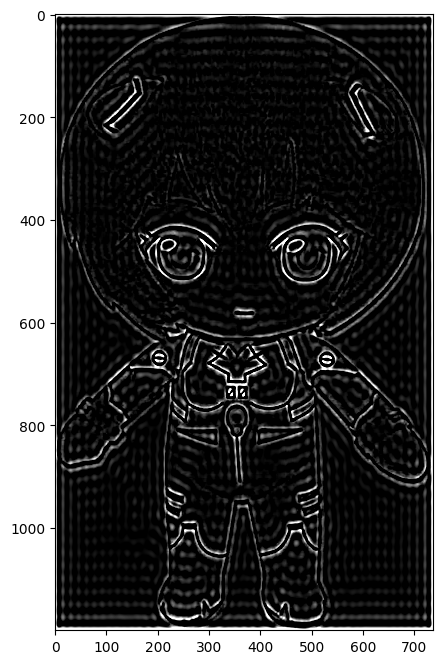

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

H = ((f-fil)**2 + (c-col)**2) <=  (0.08*fil)**2
H_pa_ideal = 1 - np.int32(H)

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_ideal

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

In [ ]:
#PASA ALTOS IDEAL

def filtro_ideal_pa(ruta='Imagenes/rei.jpg', suavizado=0.0):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil,col = img.shape
  img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

  #Filtro
  H = np.zeros_like(img_padded)
  f, c = np.ogrid[0:2*fil,0:2*col]

  H = ((f-fil)**2 + (c-col)**2) <=  (suavizado*fil)**2
  H_ideal_pa = 1-np.int32(H)

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_ideal_pa

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:2*fil, 0:2*col]
  g_real2 = np.real(g)[0:fil, 0:col]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_ideal_pa, cmap='gray')
  axs[1][0].set_title('Filtro Ideal PA')
  #Convolución
  axs[1][1].imshow(g_real1*5, cmap='gray',vmin=0, vmax=255)
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2*5, cmap='gray',vmin=0, vmax=255)
  axs[1][2].set_title('Resultado 2')

  plt.show()

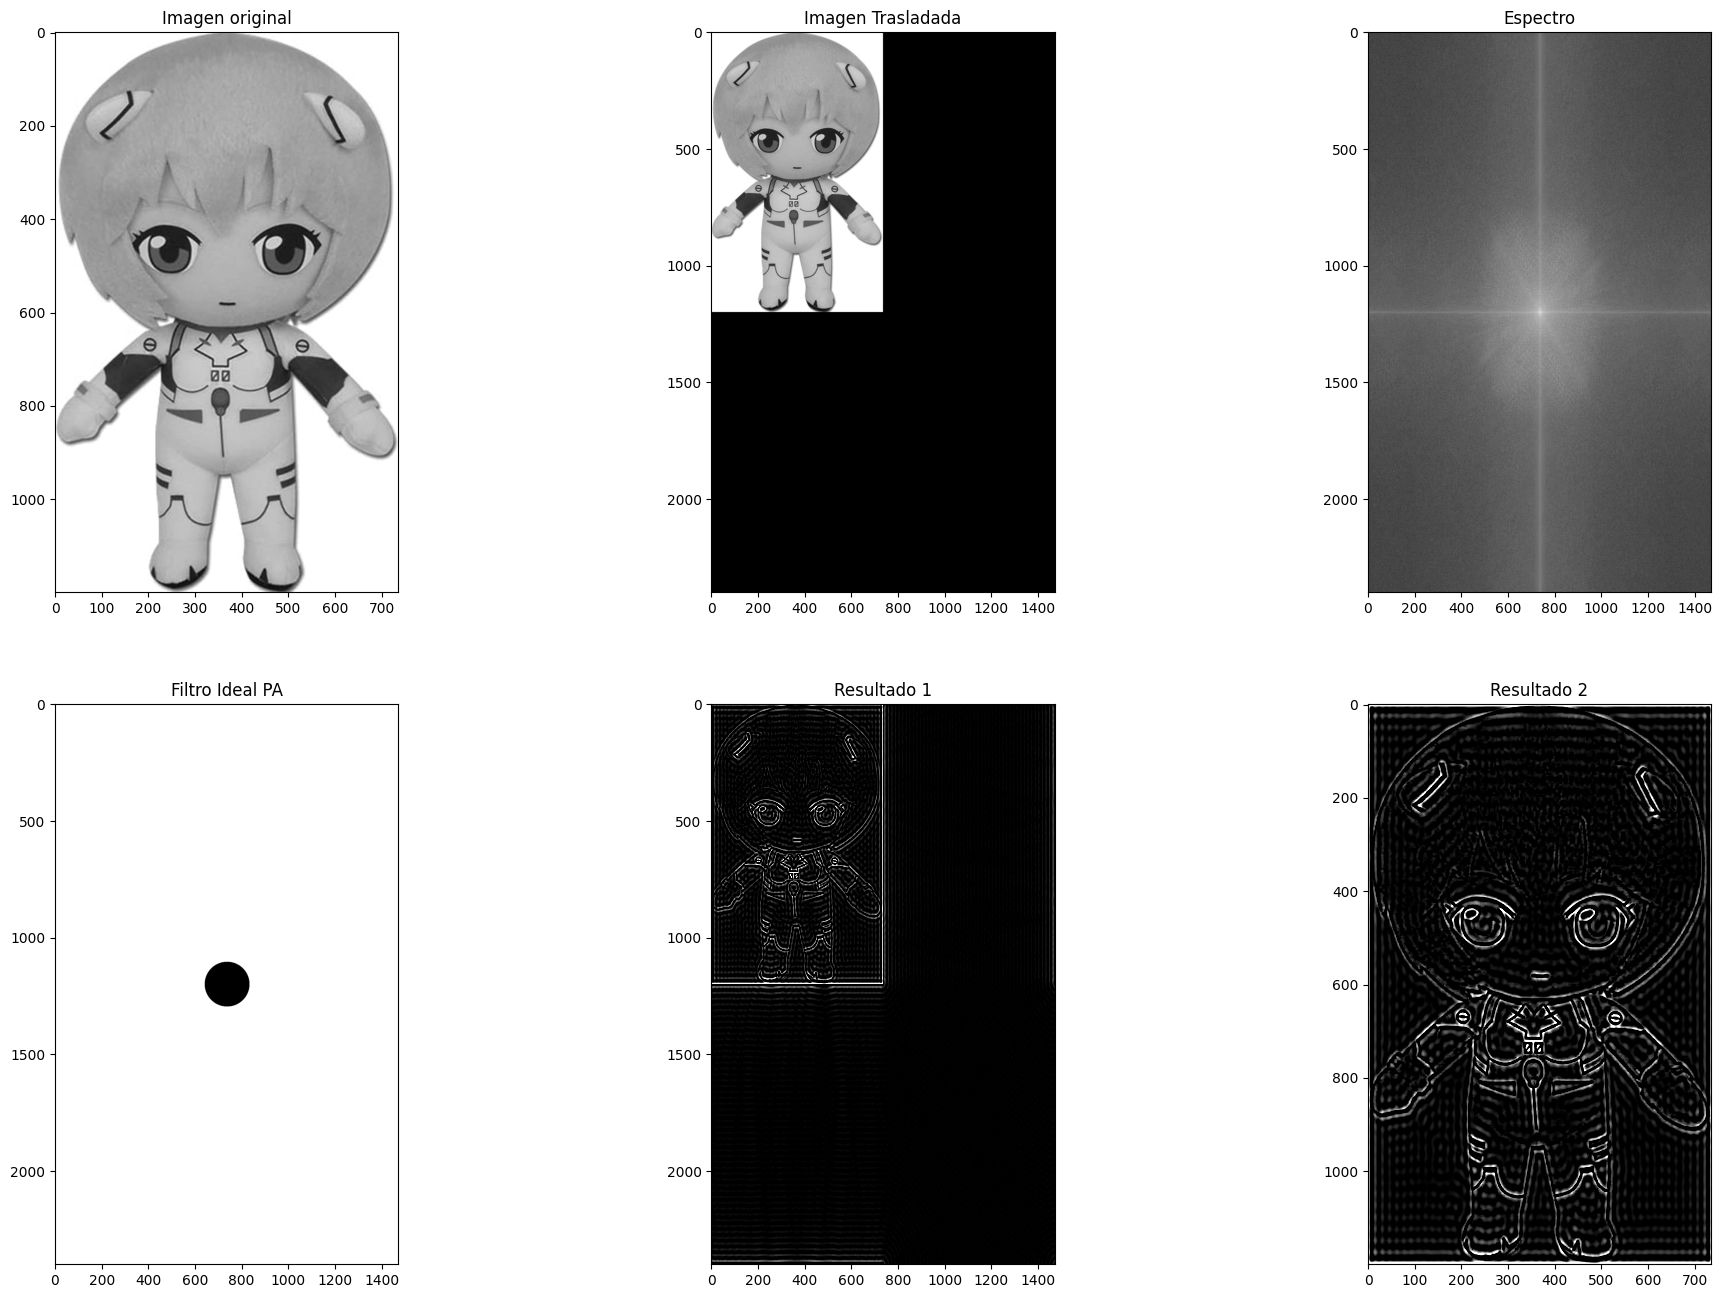

In [ ]:
filtro_ideal_pa(ruta,0.08)

#### 7.2. Filtro pasalto butterworth

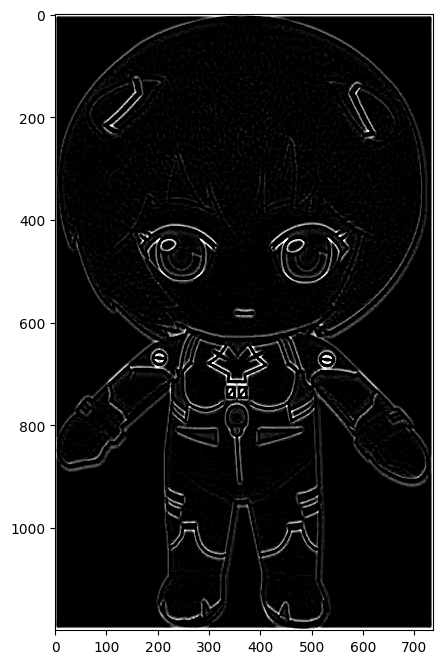

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

n = 2
D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.1*fil)
H_pa_butter = 1 - 1/(1 + (D/D0)**(2*n))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_butter

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

In [ ]:
#PASA ALTOS BUTTERWORTH

def filtro_butterworth_pa(ruta='Imagenes/rei.jpg', suavizado=0.1, n=2):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil,col = img.shape
  img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

  #Filtro
  f, c = np.ogrid[0:2*fil,0:2*col]
  D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
  D0 = (suavizado*fil)
  H_butter_pa = 1 - 1/(1 + (D/D0)**(2*n))

  #Transformada
  img_fft = np.fft.fft2(img_padded)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_butter_pa

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:2*fil, 0:2*col]
  g_real2 = np.real(g)[0:fil, 0:col]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_butter_pa, cmap='gray')
  axs[1][0].set_title('Filtro Butterworth PA')
  #Convolución
  axs[1][1].imshow(g_real1*5, cmap='gray',vmin=0, vmax=255)
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2*5, cmap='gray',vmin=0, vmax=255)
  axs[1][2].set_title('Resultado 2')

  plt.show()

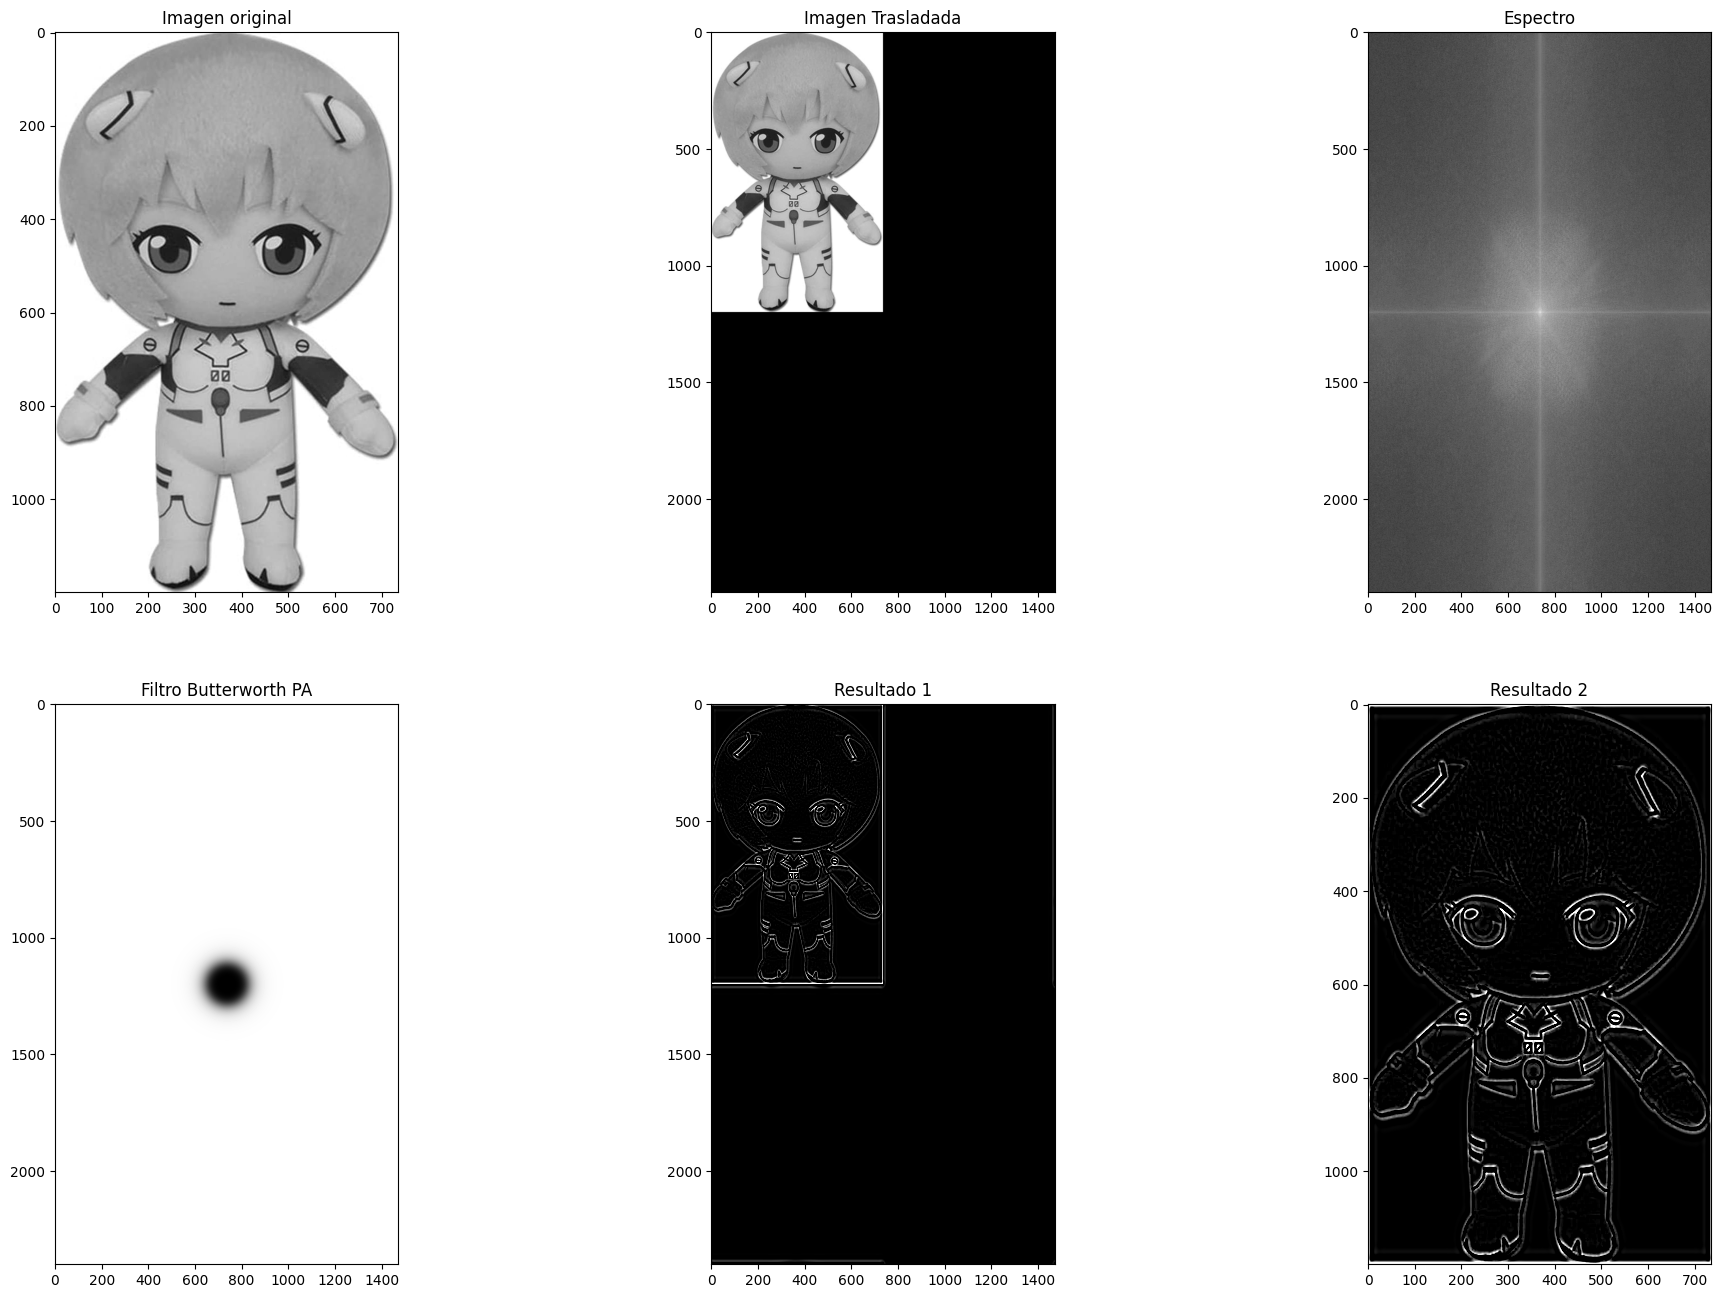

In [ ]:
filtro_butterworth_pa(ruta,0.08,3)

#### 7.3. Filtro pasaalto gaussiano

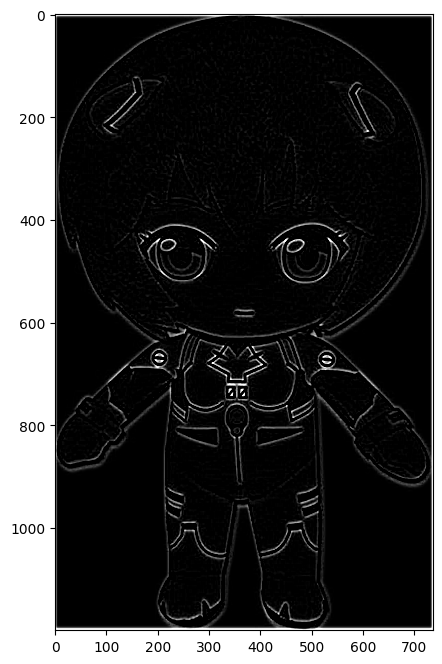

In [ ]:
img = cv2.imread('Imagenes/rei.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.1*fil)
H_pa_gauss = 1 - np.exp(-(D**2)/(2*(D0**2)))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_gauss

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

In [ ]:
#PASA ALTO GAUSSIANO

def filtro_gaussiano_pa(ruta='Imagenes/rei.jpg', suavizado=0.08):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil,col = img.shape
  img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

  #Filtro
  f, c = np.ogrid[0:2*fil,0:2*col]
  D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
  D0 = (suavizado*fil)
  H_gauss_pa = 1 - np.exp(-(D**2)/(2*(D0**2)))

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  G_fft = img_fft_shift * H_gauss_pa

  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:2*fil, 0:2*col]
  g_real2 = np.real(g)[0:fil, 0:col]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Trasladada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H_gauss_pa, cmap='gray')
  axs[1][0].set_title('Filtro Gaussiano PA')
  #Convolución
  axs[1][1].imshow(g_real1*5, cmap='gray',vmin=0, vmax=255)
  axs[1][1].set_title('Resultado 1')
  #Resultdo
  axs[1][2].imshow(g_real2*5, cmap='gray',vmin=0, vmax=255)
  axs[1][2].set_title('Resultado 2')

  plt.show()

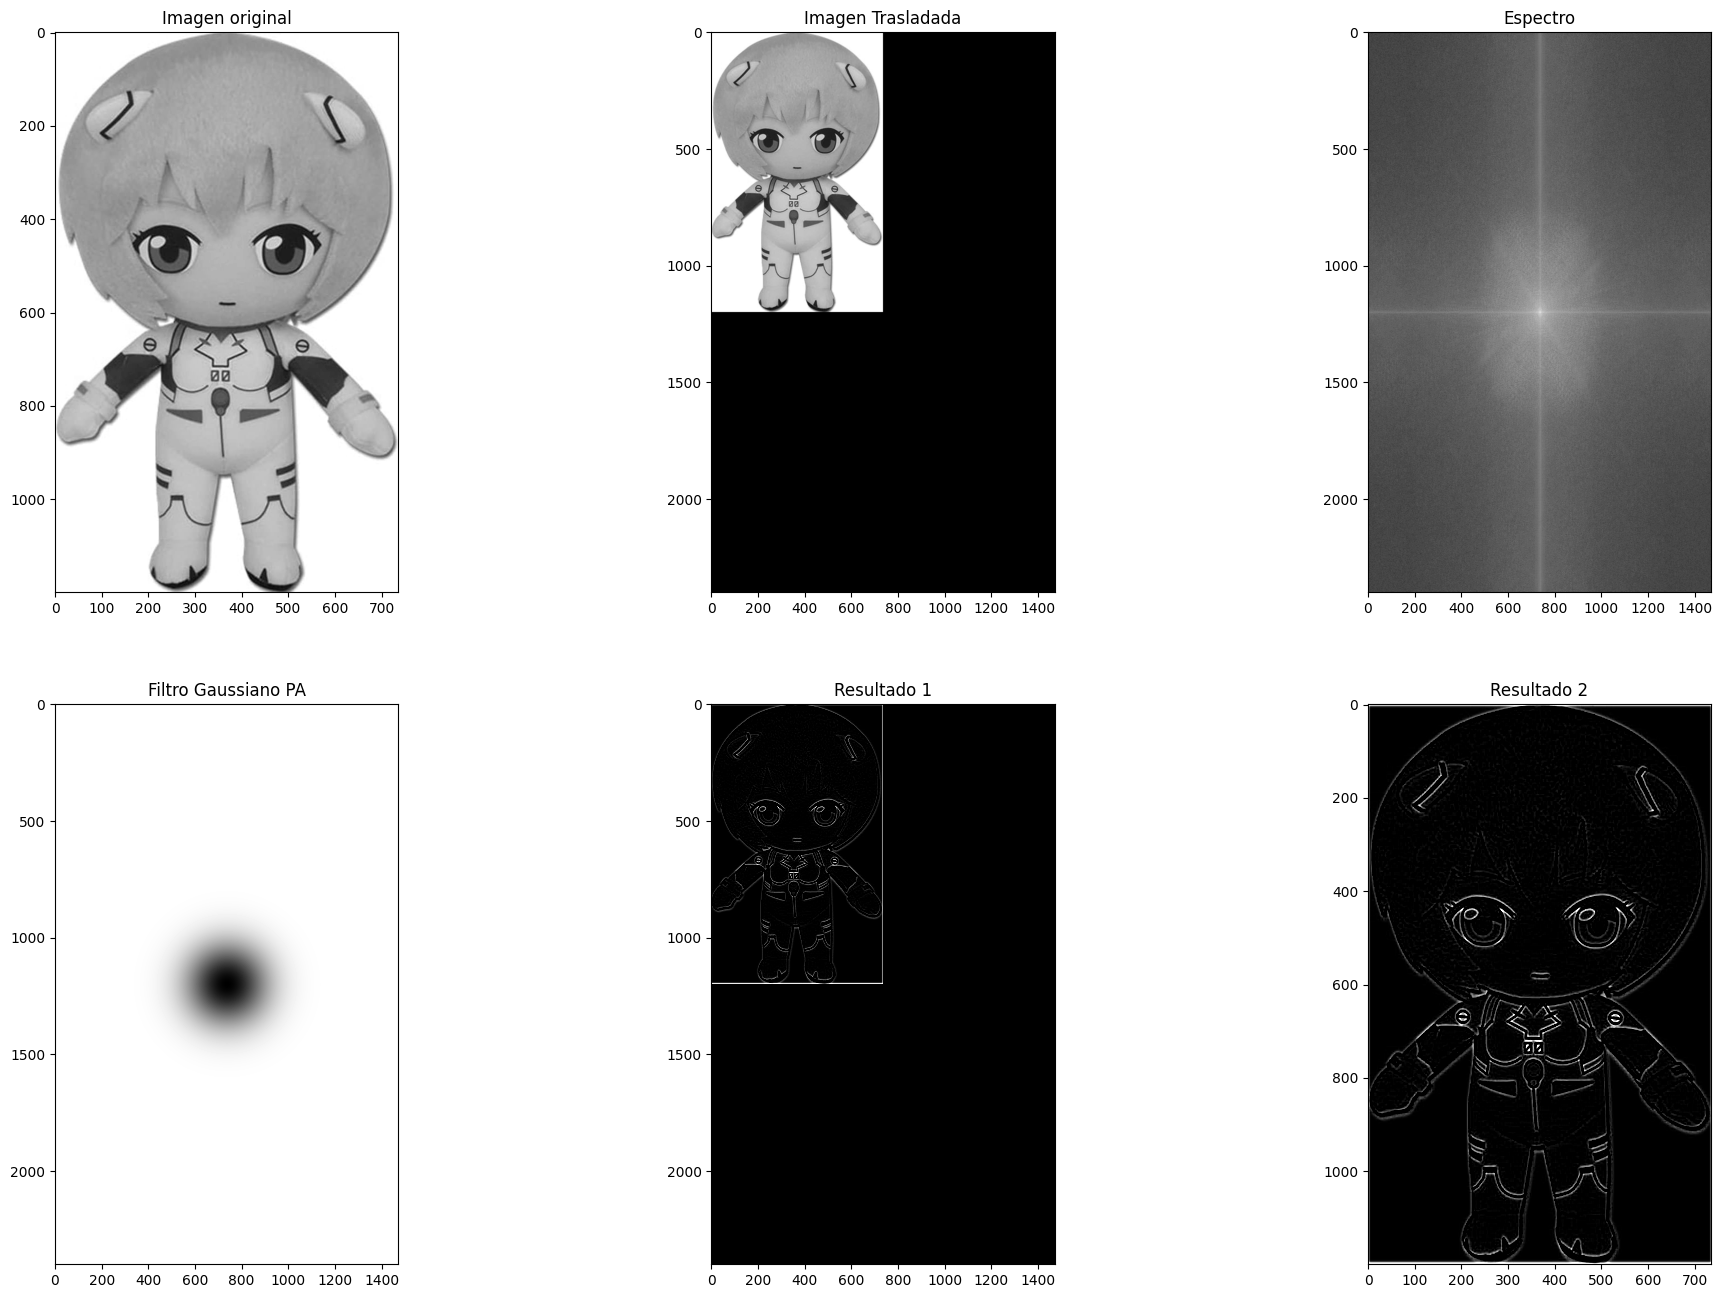

In [ ]:
filtro_gaussiano_pa(ruta,0.1)

**RESUMEN**

Funcion para filtros:

Parametros (ruta,select,suavizado,filtro,n)



*   ruta : ruta del archivo
*   select :  
              0 -> paso bajo
              1 -> paso alto

*  suavizado: suavizado
*  filtro:
            0 -> Ideal
            1 -> Butterworth
            2 -> Gaussiano
* n: Parámetro del filtro Butterworth


In [ ]:
def filtro_pa_pb(ruta='Imagenes/rei.jpg', select=1 ,suavizado=0.1, filtro=2,n=2):
  #Imagen
  img = cv2.imread(ruta, 0)
  fil,col = img.shape
  img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

  #Filtro
  f, c = np.ogrid[0:2*fil,0:2*col]

  if filtro == 0:   #Filtro ideal
      H = np.zeros_like(img_padded)
      H = ((f-fil)**2 + (c-col)**2) <=  (suavizado*fil)**2
      H = np.int32(H)
      clase = 'Ideal'
  elif filtro == 1: #Butterworth
      D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
      D0 = (suavizado*fil)
      H = 1/(1 + (D/D0)**(2*n))
      clase = 'Butterworth'
  else:             #Gaussiano
      D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
      D0 = (suavizado*fil)
      H = np.exp(-(D**2)/(2*(D0**2)))
      clase = 'Gaussiano'

  #Transformada
  img_fft = np.fft.fft2(img_traslated)
  img_fft_shift = np.fft.fftshift(img_fft)
  espectro = np.log(1 + np.abs(img_fft_shift))

  #Convolución
  if select == 0:  #Paso bajo
    G_fft = img_fft_shift * H
    name = 'Paso bajo'
  else:            #Paso alto
    G_fft = img_fft_shift * (1-H)
    name = 'Paso alto'
  #Resultado
  G_fft_ishift = np.fft.ifftshift(G_fft)
  g = np.fft.ifft2(G_fft_ishift)
  g_real1 = np.real(g)[0:2*fil, 0:2*col]
  g_real2 = np.real(g)[0:fil, 0:col]

  #Grafica

  fig, axs = plt.subplots(2, 3, figsize=(24, 16))

  # Imagen Original
  axs[0][0].imshow(img, cmap='gray')
  axs[0][0].set_title('Imagen original')
  # Imagen transladada
  axs[0][1].imshow(img_traslated, cmap='gray')
  axs[0][1].set_title('Imagen Paddeada')
  # Imagen transladada
  axs[0][2].imshow(espectro, cmap='gray')
  axs[0][2].set_title('Espectro')
  # Filtro
  axs[1][0].imshow(H, cmap='gray')
  axs[1][0].set_title(f'Filtro {clase} {name}')

  if select == 0:  #Paso bajo
    #Convolución
    axs[1][1].imshow(g_real1, cmap='gray')
    axs[1][1].set_title('Resultado 1')
    #Resultdo
    axs[1][2].imshow(g_real2, cmap='gray')
    axs[1][2].set_title('Resultado 2')
  else:            #Paso alto
    #Convolución
    axs[1][1].imshow(g_real1*5, cmap='gray',vmin=0, vmax=255)
    axs[1][1].set_title('Resultado 1')
    #Resultdo
    axs[1][2].imshow(g_real2*5, cmap='gray',vmin=0, vmax=255)
    axs[1][2].set_title('Resultado 2')

  plt.show()

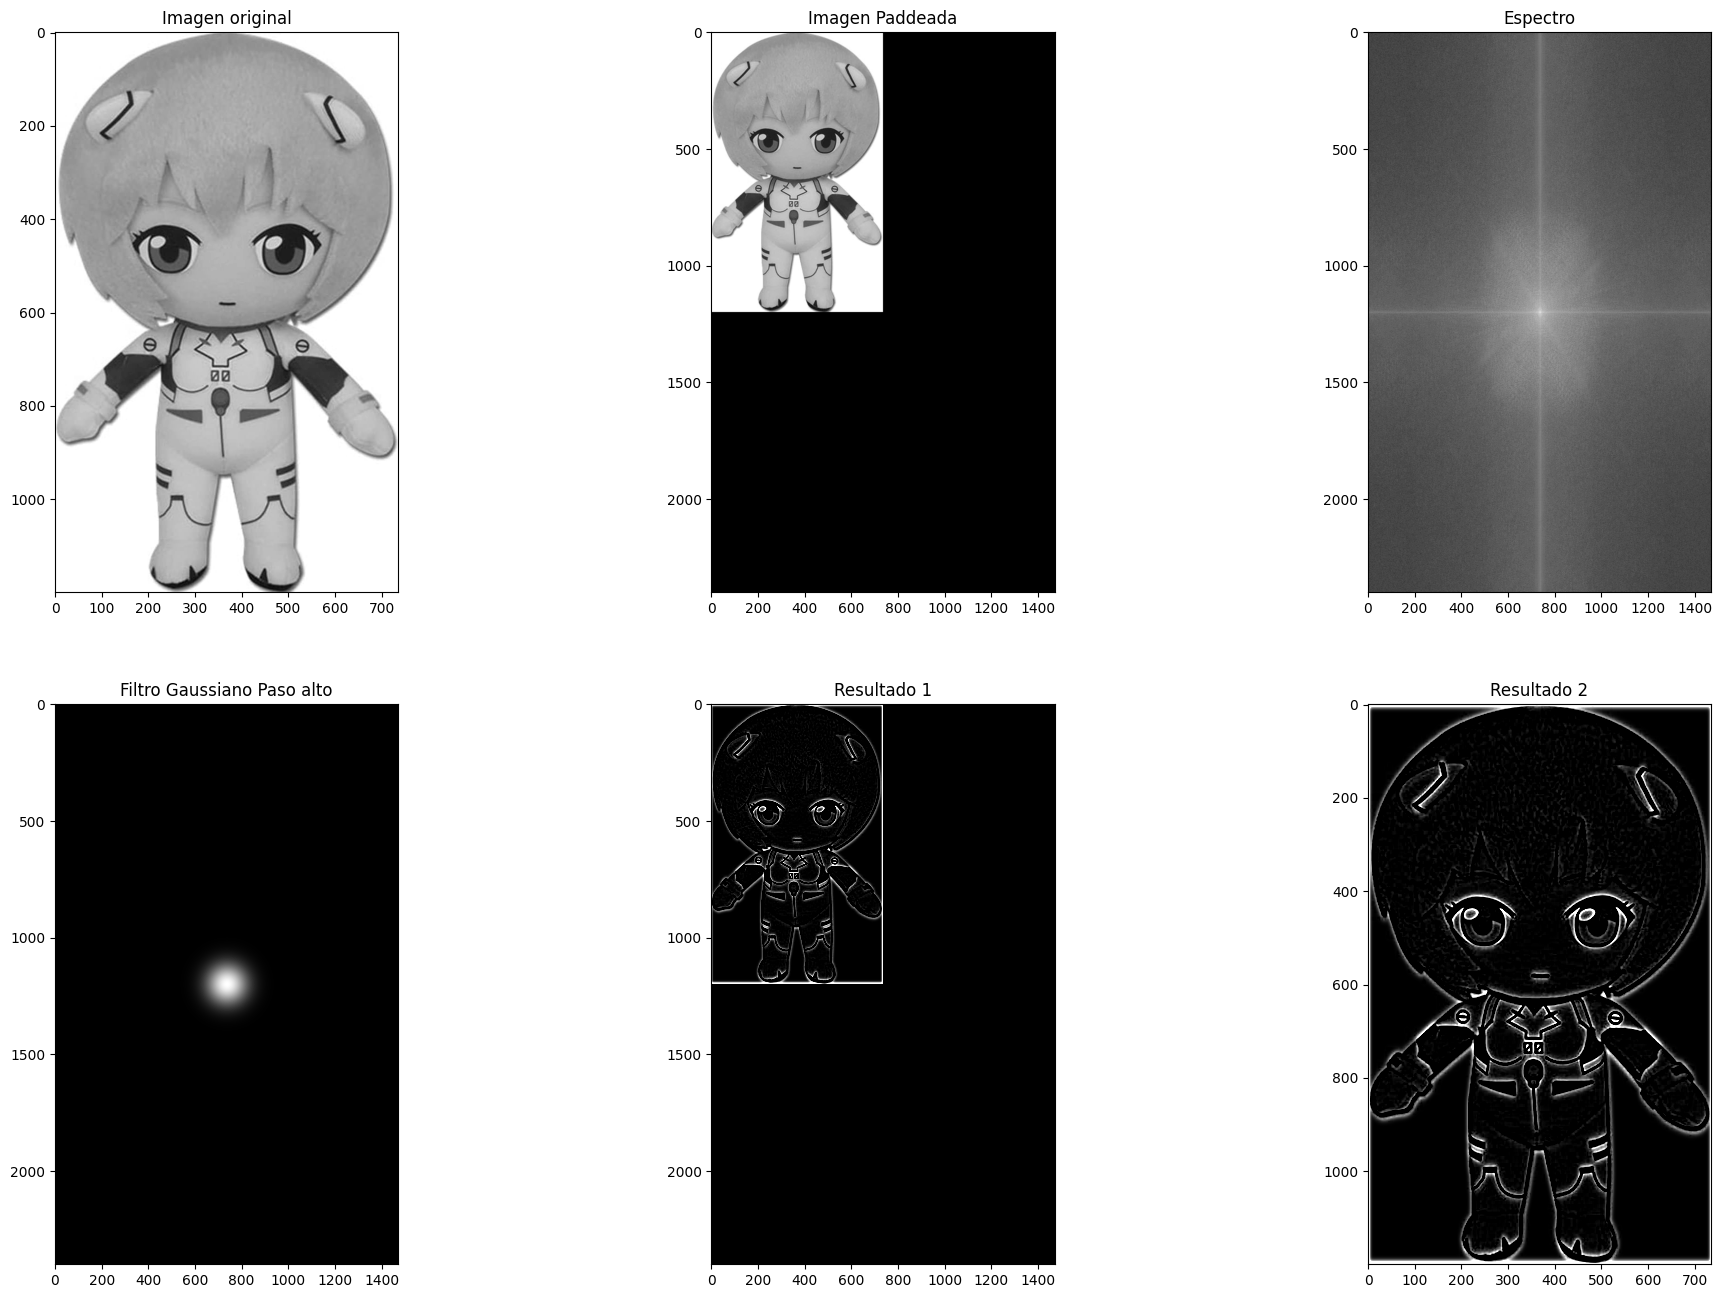

In [ ]:
filtro_pa_pb(ruta,1,0.05,2,1)

```
Cada estudiante debe escribir una reflexión propia sobre el aprendizaje obtenido con la presenta guía
```

Perez Garcia Gustavp Rafael:

En la clase el día de hoy aprendí sobre cómo se pueden usar filtros para modificar y mejorar las imágenes. Así mismo pude identificar cada uno de los filtros y su propósito específico, por ejemplo los filtros en funcion de la frecuencia pueden variar su propósito dependiendo de las banda de frecuencia que se rechaze.









Salazar Llamoga William Jesus:

Hoy aprendí sobre cómo mejorar imágenes usando diferentes filtros. Descubrí cómo la máscara de desenfoque y el filtro de alto aumento pueden realzar detalles, y cómo ajustar el parámetro
𝑛
 en la distribución Butterworth afecta la suavidad de los bordes.


Solon Aquino Jashua Jafet:

Hoy aprendí que la convolución en el dominio de la frecuencia es una simple multiplicación. Gracias a la propiedad de convolución de la Transformada de Fourier, podemos transformar señales al dominio de la frecuencia, multiplicarlas y luego aplicar la transformada inversa para obtener el resultado en el dominio del tiempo. Este proceso es más eficiente, especialmente para señales largas, gracias a la Transformada Rápida de Fourier (FFT), que reduce significativamente el tiempo de cálculo en comparación con la Transformada de Fourier Discreta (DFT).